In [1]:
import numpy as np
from scipy import sparse

P = np.array(
    [
        [0, 1 / 3, 1 / 3, 1 / 3],
        [1 / 2, 0, 1 / 2, 0],
        [1 / 2, 1 / 2, 0, 0],
        [1, 0, 0, 0],
    ]
)

deg = np.array([3, 2, 2, 1])

Text(0.5, 25.722222222222214, 'Time Step')

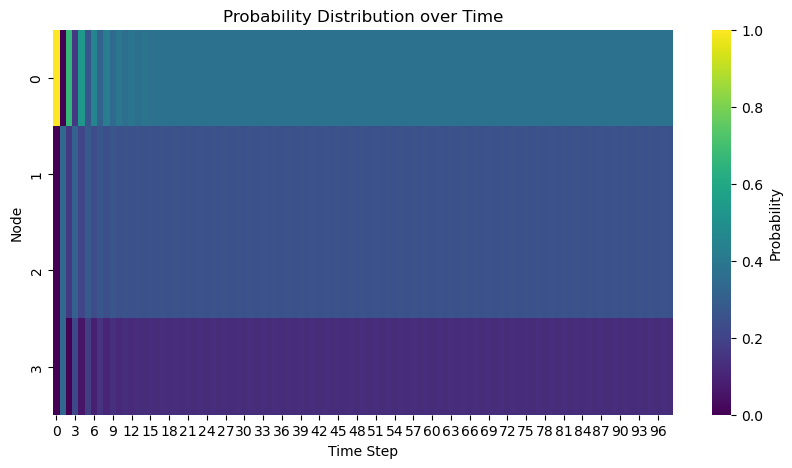

In [7]:
probabilities_list = []

Pt = np.eye(P.shape[0])
for t in range(1, 100):
    # Apply the transition matirx
    Pt = Pt @ P
    # Get the probability distribution of being at each node after t steps from A
    probabilities_list.append(Pt[3, :])

probabilities_array = np.array(probabilities_list)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(probabilities_array.T, cmap='viridis', cbar_kws={'label': 'Probability'}, ax=ax)
plt.title('Probability Distribution over Time')
plt.ylabel('Node')
plt.xlabel('Time Step')

In [9]:
import igraph as ig
import numpy as np

g = ig.Graph.Famous("Zachary")
A = g.get_adjacency_sparse()

# Transition probabilit matrix 

In [10]:
deg = np.array(A.sum(axis = 0)).flatten()
# D = np.diag(deg) # diagonal degree matrix
Dinv = np.diag(1.0 / deg)
P = Dinv @ A # transition probability matrix


# Compute the stationary distribution
## Based on the left eigenvector

In [25]:
# Compute the left eigenvector of P
# Use np.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(P.T)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

idx = np.argmax(eigenvalues)
eigenval = eigenvalues[idx]
stationary_dist = eigenvectors[:, idx].flatten().real
stationary_dist = stationary_dist / np.sum(stationary_dist)
import pandas as pd

pd.DataFrame({"degree": deg, "stationary_dist": stationary_dist}).corr()


,degree,stationary_dist
degree,1.0,1.0
stationary_dist,1.0,1.0


## Based on the power iteration

In [ ]:
T = 1000
Pt = np.eye(P.shape[0])
for t in range(T):
    Pt = Pt @ P

xt = Pt[0, :]